In [35]:
import pygmo as pg
from pykep import epoch
from pykep.planet import jpl_lp
from pykep.planet import gtoc6
from pykep.trajopt import mga_1dsm
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [10]:
toftest=np.array([0.7 * 365.25, 3 * 365.25]).reshape(1, 2)
print(np.shape(toftest))
print(toftest)

(1, 2)
[[ 255.675 1095.75 ]]


In [29]:
print(epoch(-7000))

1980-Nov-01 00:00:00


In [36]:
seq = [gtoc6('io'),gtoc6('europa'),gtoc6('ganymede')]


In [37]:
udp = mga_1dsm(
    seq=seq,
    t0=[epoch(0), epoch(1000)],
    tof=[0.1 * 365.25, 0.8 * 365.25],
    vinf=[0.5, 2.5],
    add_vinf_dep=False,
    add_vinf_arr=True,
    multi_objective=False,
    tof_encoding='alpha'
)

pg.problem(udp)
# We solve it!!
uda = pg.sade(gen=100)
archi = pg.archipelago(algo=uda, prob=udp, n=8, pop_size=20)
print(
    "Running a Self-Adaptive Differential Evolution Algorithm .... on 8 parallel islands")
archi.evolve(10)
archi.wait()
sols = archi.get_champions_f()
idx = sols.index(min(sols))
print("Done!! Solutions found are: ", archi.get_champions_f())
udp.pretty(archi.get_champions_x()[idx])
# udp.plot(archi.get_champions_x()[idx])

Running a Self-Adaptive Differential Evolution Algorithm .... on 8 parallel islands
Done!! Solutions found are:  [array([9355480.51021162]), array([7901734.03505284]), array([6996734.48689603]), array([4513402.53786131]), array([8926189.90960398]), array([8698721.41790315]), array([10032368.94025836]), array([10041455.31084076])]
First Leg: io to europa
Departure: 2000-May-22 02:39:02.136217 (142.1104413913993 mjd2000) 
Duration: 48.80449536201908days
VINF: 1.8671566147354566 km/sec
DSM after 15.049894486271947 days
DSM magnitude: 4505469.730669514m/s

leg no. 2: europa to ganymede
Duration: 23.630001931223262days
Fly-by epoch: 2000-Jul-09 21:57:30.535495 (190.91493675341837 mjd2000) 
Fly-by radius: 1.0738832220917833 planetary radii
DSM after 5.583257502155445 days
DSM magnitude: 4610.3684521681635m/s

Arrival at ganymede
Arrival epoch: 2000-Aug-02 13:04:42.702353 (214.54493868464164 mjd2000) 
Arrival Vinf: 3322.4387396299135m/s
Total mission time: 0.1983148454298216 years (72.4344972

In [41]:
print((archi.get_champions_x()[idx]))

[1.42110441e+02 5.46132682e-01 8.57041817e-01 1.86715661e+03
 3.08371071e-01 1.80147541e-01 1.58807033e+00 1.07388322e+00
 2.36278335e-01 4.36106489e-01 7.24344973e+01]


RuntimeError: Error in function boost::math::tools::bracket_and_solve_root<double>: Unable to bracket root, last nearest value was -nan

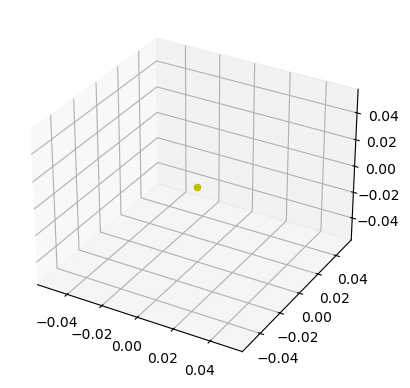

In [47]:
# Plot our trajectory
fig = plt.figure(figsize = (16,5))
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1 = udp.plot(archi.get_champions_x()[idx],ax=ax1)
